# MATH 210 Introduction to Mathematical Computing

## March 21, 2018

* Euler's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler's method

Consider a first order differential equation of the form $y' = f(t,y)$. [Euler's method](https://en.wikipedia.org/wiki/Euler_method) is an iterative algorithm for approximating a solution of a first order differential equation with initial value $y(t_0) = y_0$. The formula for Euler's method with time step $h$ is

$$
y_{n+1} = y_n + f(t_n,y_n) h
$$

Each value $y_n$ is an approximation of the true value $y(t_n)$ where $t_n = t_0 + n h$.

Let's write a function which implements Euler's method.

In [2]:
def euler_method(f,t0,tf,y0,h):
    '''Approximate a solution of y' = f(t,y) by Euler's method: y[n+1] = y[n] + f(t[n],y[n])*h
    
    Parameters
    ----------
    f : function of 2 variables, the right hand side of the ODE y'=f(t,y)
    t0 : the start of the interval of integration [t0,tf]
    tf : the end of the interval of integration [t0,tf]
    y0 : initial value y(t0) = y0
    h : time step in Euler's method
    
    Returns
    -------
    A 2D NumPy array where column at index 0 contains the t values
    from t0 to tf (inclusively) by step h and column at index 1
    contains y values of a approximation of the solution of y'=f(t,y)
    with initial condition y(t_0)=y_0.
    '''
    t = np.arange(t0,tf,h)
    t = np.append(t,tf) # Include the endpoint
    N = len(t)
    y = np.zeros(N)
    y[0] = y0
    for n in range(0,N-1):
        y[n+1] = y[n] + f(t[n],y[n])*h
    return np.column_stack([t,y])

Let's test our function on a differential equation for which we know the solution: $y'=y$ with $y(0)=1$. The solution is $y(t) = e^t$.

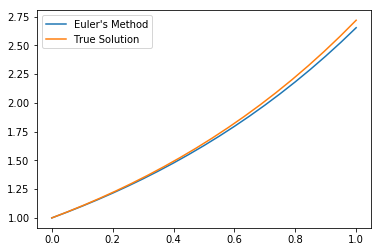

In [3]:
def f(t,y):
    return y

solution = euler_method(f,0,1,1,0.05)
plt.plot(solution[:,0],solution[:,1])
t = np.linspace(0,1,20)
y = np.exp(t)
plt.plot(t,y)
plt.legend(["Euler's Method",'True Solution'])
plt.show()

Success! Now let's use our function to approximate solutions of equations that are very difficult to solve!

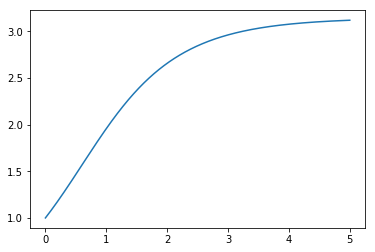

In [4]:
def f(t,y):
    return np.sin(y)

solution = euler_method(f,0,5,1,0.001)
plt.plot(solution[:,0],solution[:,1])
plt.show()

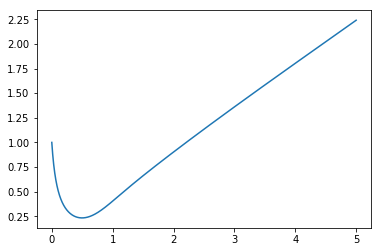

In [5]:
def f(t,y):
    return np.sin(y)**2 + 2*t**2 - 10*y**2

solution = euler_method(f,0,5,1,0.001)
plt.plot(solution[:,0],solution[:,1])
plt.show()